In [3]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np

# Set the path to the stats
stats_path_model1 = 'gpt2_2e-05_200'
stats_path_model2 = 'gpt2_5e-05_67'

# Get the model name and learning rate from the path
model_name1 = stats_path_model1.split('_')[0]
learning_rate1 = stats_path_model1.split('_')[1]
model_name2 = stats_path_model2.split('_')[0]
learning_rate2 = stats_path_model2.split('_')[1]

# Load the stats
def load_stats(foldername):
    # Load the data from a JSON file
    with open('history/' + foldername + '/stats/' + '_'.join(foldername.split('_')[:2]) + '.json', 'r') as f:
        stats = json.load(f)

    return stats

# Load the stats
stats_gpt2_2e_05_200 = load_stats(stats_path_model1)
stats_gpt2_5e_05_67 = load_stats(stats_path_model2)

In [4]:
# Get the first 62 epochs for gpt2_2e-05_200
first_62_epochs_gpt2_2e_05_200 = stats_gpt2_2e_05_200[:67]

# Get the fist 62 epochs for gpt2_5e-05_67
first_62_epochs_gpt2_5e_05_67 = stats_gpt2_5e_05_67[:67]

In [5]:
def avg_correct_size_comparison_graph(model1, model2):
    # Create a list of epochs
    epochs1 = [stat['epoch'] for stat in model1]
    epochs2 = [stat['epoch'] for stat in model2]
    # Create a list of correct size tests
    correct_size_tests1 = [stat['correct_size_tests'] for stat in model1]
    correct_size_tests2 = [stat['correct_size_tests'] for stat in model2]

    def moving_average(data) :
        # Compute the window size as a percentage of the total number of data points
        window_size = int(len(data) * 0.05)
        if window_size == 0:
            window_size = 1
        return np.convolve(data, np.ones(window_size), 'valid') / window_size
    
    # Calculate the moving averages
    correct_size_tests1_avg = moving_average(correct_size_tests1)
    correct_size_tests2_avg = moving_average(correct_size_tests2)

    # Adjust epochs for moving average
    epochs1_avg = epochs1[len(epochs1) - len(correct_size_tests1_avg):]
    epochs2_avg = epochs2[len(epochs2) - len(correct_size_tests2_avg):]

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Plot the moving averages
    ax.plot(epochs1_avg, correct_size_tests1_avg, color='red', label=learning_rate1)
    ax.plot(epochs2_avg, correct_size_tests2_avg, color='blue', label=learning_rate2)
    # Set the title
    ax.set_title("Learning rate comparison over the moving average of the correct size tests")

    # Set the x-axis label
    ax.set_xlabel("Epoch")

    # Set the y-axis label
    ax.set_ylabel("tests")

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()



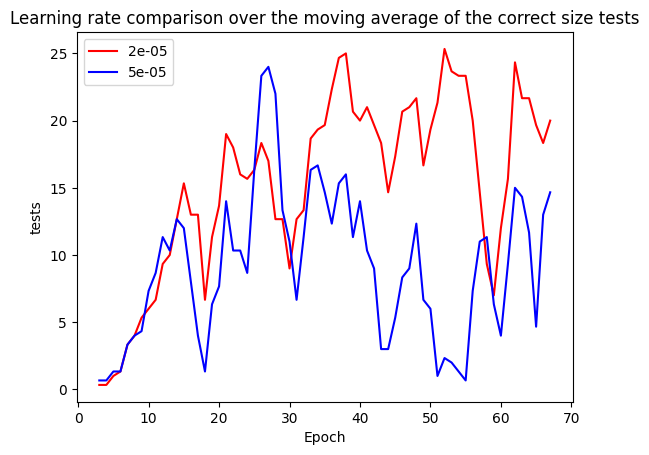

In [6]:
avg_correct_size_comparison_graph(first_62_epochs_gpt2_2e_05_200, first_62_epochs_gpt2_5e_05_67)